In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

### 1) Importer le dataset

In [2]:
dataset=pd.read_csv("Housing.csv")
dataset = pd.DataFrame(dataset)
dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


### 2) Nettoyage de Data

In [3]:
# MAP yes/no → 1/0
yes_no_map = {"yes": 1, "no": 0}

cols_yes_no = [
    "mainroad",
    "guestroom",
    "basement",
    "hotwaterheating",
    "airconditioning",
    "prefarea"
]

dataset[cols_yes_no] = dataset[cols_yes_no].replace(yes_no_map)

# MAP furnishingstatus → 2/1/0
furn_map = {
    "furnished": 2,
    "semi-furnished": 1,
    "unfurnished": 0
}

dataset["furnishingstatus"] = dataset["furnishingstatus"].replace(furn_map)

# Extraire X valeurs
x = dataset[[
    "area","bedrooms","bathrooms","stories",
    "mainroad","guestroom","basement","hotwaterheating",
    "airconditioning","parking","prefarea","furnishingstatus"
]].values

dataset.head()

C:\Users\ayoub\AppData\Local\Temp\ipykernel_42496\2894784765.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset[cols_yes_no] = dataset[cols_yes_no].replace(yes_no_map)
C:\Users\ayoub\AppData\Local\Temp\ipykernel_42496\2894784765.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset["furnishingstatus"] = dataset["furnishingstatus"].replace(furn_map)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


### 3) Définition des x et y initial

In [4]:
#Création de X et Y
x = dataset[["area","bedrooms","bathrooms","stories","mainroad","guestroom","basement","hotwaterheating","airconditioning","parking","prefarea","furnishingstatus"]].values
y = dataset[["price"]].values 

# x = x.reshape(x.shape[0],3)
y = y.reshape(y.shape[0],1)
print(x.shape)
print(y.shape)

(545, 12)
(545, 1)


### 4) Détermination du degré de polynome

#### 4.1 Avec la validation croisée

In [5]:
# # Séparation des données en jeu d'entraînement et de test
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# # Tester plusieurs degrés sur les données d'entraînement uniquement
# degrees = range(1, 10)
# cv_errors = []

# for d in degrees:
#     poly = PolynomialFeatures(degree=d)
#     x_train_poly = poly.fit_transform(x_train)
    
#     model = LinearRegression()
    
#     # Validation croisée sur l'ensemble d'entraînement
#     scores = cross_val_score(model, x_train_poly, y_train, cv=5, scoring='neg_mean_squared_error')
#     cv_errors.append(-np.mean(scores))

# # Trouver le degré optimal selon la validation croisée
# optimal_degree = degrees[np.argmin(cv_errors)]
# print("Le degré optimal avec la vildation croisée est : ",optimal_degree)

#### 3.2 En utilisant le BIC

In [6]:
# # Séparation des données en jeu d'entraînement et de test
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# # Tester plusieurs degrés sur l'ensemble d'entraînement uniquement
# degrees = range(1, 10)
# bic_values = []

# n_train = len(y_train)  # Nombre d'observations dans l'ensemble d'entraînement

# for d in degrees:
#     poly = PolynomialFeatures(degree=d)
#     x_train_poly = poly.fit_transform(x_train)

#     model = LinearRegression()
#     model.fit(x_train_poly, y_train)

#     # Prédictions et erreur quadratique moyenne sur l'ensemble d'entraînement
#     y_train_pred = model.predict(x_train_poly)
#     mse = mean_squared_error(y_train, y_train_pred)

#     # Calcul du BIC sur l'ensemble d'entraînement
#     k = x_train_poly.shape[1]  # Nombre de paramètres (termes polynomiaux)
#     bic = n_train * np.log(mse) + k * np.log(n_train)
#     bic_values.append(bic)

# # Trouver le degré optimal selon le BIC
# optimal_degree_bic = degrees[np.argmin(bic_values)]
# print("Le degré optimal avec le BIC est : ",optimal_degree_bic)

#### 3.3 En minimisant l'erreur de test.

In [7]:
# # Séparation des données en jeu d'entraînement et de test
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# # Tester plusieurs degrés de polynôme
# degrees = range(1, 10)
# train_errors = []
# test_errors = []

# for d in degrees:
#     poly = PolynomialFeatures(degree=d)
#     x_train_poly = poly.fit_transform(x_train)
#     x_test_poly = poly.transform(x_test)
    
#     model = LinearRegression()
#     model.fit(x_train_poly, y_train)
    
#     # Prédictions
#     y_train_pred = model.predict(x_train_poly)
#     y_test_pred = model.predict(x_test_poly)
    
#     # Calcul de l'erreur quadratique moyenne (MSE)
#     train_mse = mean_squared_error(y_train, y_train_pred)
#     test_mse = mean_squared_error(y_test, y_test_pred)
    
#     train_errors.append(train_mse)
#     test_errors.append(test_mse)

# # Trouver le degré optimal selon l'erreur de test minimale
# optimal_degree_test = degrees[np.argmin(test_errors)]
# print("Le degré optimal avec la minimisation de l'erreur de test est : ",optimal_degree_test)

### 4) Construction de la matrice polynomiale X de degré 2

In [ ]:
# Création de la matrice X

# Ajout des termes polynomiaux
poly = PolynomialFeatures(degree=2, include_bias=False)
X = poly.fit_transform(x)
print(X.shape)
print(X[:5])

(545, 90)
[[7.42000e+03 4.00000e+00 2.00000e+00 3.00000e+00 1.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 1.00000e+00 2.00000e+00 1.00000e+00 2.00000e+00
  5.50564e+07 2.96800e+04 1.48400e+04 2.22600e+04 7.42000e+03 0.00000e+00
  0.00000e+00 0.00000e+00 7.42000e+03 1.48400e+04 7.42000e+03 1.48400e+04
  1.60000e+01 8.00000e+00 1.20000e+01 4.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 4.00000e+00 8.00000e+00 4.00000e+00 8.00000e+00 4.00000e+00
  6.00000e+00 2.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 2.00000e+00
  4.00000e+00 2.00000e+00 4.00000e+00 9.00000e+00 3.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 3.00000e+00 6.00000e+00 3.00000e+00 6.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 2.00000e+00
  1.00000e+00 2.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 1.

### 5) Séparation des données en données d'entrainement et de test

In [28]:
#data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_test[:5])

[[5.90000e+03 4.00000e+00 2.00000e+00 2.00000e+00 0.00000e+00 0.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
  3.48100e+07 2.36000e+04 1.18000e+04 1.18000e+04 0.00000e+00 0.00000e+00
  5.90000e+03 0.00000e+00 0.00000e+00 5.90000e+03 0.00000e+00 0.00000e+00
  1.60000e+01 8.00000e+00 8.00000e+00 0.00000e+00 0.00000e+00 4.00000e+00
  0.00000e+00 0.00000e+00 4.00000e+00 0.00000e+00 0.00000e+00 4.00000e+00
  4.00000e+00 0.00000e+00 0.00000e+00 2.00000e+00 0.00000e+00 0.00000e+00
  2.00000e+00 0.00000e+00 0.00000e+00 4.00000e+00 0.00000e+00 0.00000e+00
  2.00000e+00 0.00000e+00 0.00000e+00 2.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 0.00000e+00 

### 6) Fonction de normalisation from scratch

In [29]:
#fct de normalisation from scratch
def z_score_normalised (data):
    mean = np.mean(data, axis=0)  #calcul de moyenne
    std = np.std(data, axis=0)  #calcul de l'écart type
    data_normalized = (data - mean) / (std+0.000000000000000000001)
    return data_normalized, mean, std

##### * Normalisation  des données at ajout de la colonne des 1

In [30]:
X_train_norm, mean, std = z_score_normalised(X_train)
X_test_norm, mean, std = z_score_normalised(X_test)

#ajout de la colonne des 1
X_train_norm = np.hstack((X_train_norm, np.ones((X_train_norm.shape[0], 1))))
X_test_norm = np.hstack((X_test_norm, np.ones((X_test_norm.shape[0], 1))))
print(X_test_norm[:5])

[[ 3.76667398e-01  1.44736842e+00  1.08182900e+00  1.12385409e-01
  -2.50333111e+00 -4.59468292e-01  1.45405836e+00 -1.68231646e-01
  -7.31581347e-01  3.10318999e-01 -5.59690104e-01 -1.12110638e+00
   1.71471866e-01  1.05023437e+00  9.50558565e-01  2.52728835e-01
  -1.75388489e+00 -4.40988512e-01  1.46387551e+00 -1.64696009e-01
  -6.71689451e-01  2.24667031e-01 -5.22962070e-01 -9.22575821e-01
   1.49771131e+00  1.54462113e+00  5.90611831e-01 -2.12021750e+00
  -4.50920657e-01  1.99694889e+00 -1.66819923e-01 -7.10818360e-01
   6.04363808e-01 -5.50244314e-01 -1.05997744e+00  8.55954999e-01
   5.64808034e-01 -1.64628691e+00 -4.14780678e-01  1.89943984e+00
  -1.55438328e-01 -6.62410259e-01  6.37261068e-01 -5.20146275e-01
  -9.40789411e-01 -9.62250449e-02 -1.52701614e+00 -4.10756290e-01
   1.61350579e+00 -1.68231646e-01 -6.10989727e-01  2.92207079e-01
  -4.93624479e-01 -9.50861718e-01 -2.50333111e+00 -4.29863477e-01
  -6.16236023e-01 -1.68231646e-01 -6.58946528e-01 -7.80401004e-01
  -5.31368

### 7) Theta initial

In [31]:
#création de thetha initial
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta_initial=np.random.randn(91,1)
print('theta initial:',theta_initial)

theta initial: [[ 1.76405235]
 [ 0.40015721]
 [ 0.97873798]
 [ 2.2408932 ]
 [ 1.86755799]
 [-0.97727788]
 [ 0.95008842]
 [-0.15135721]
 [-0.10321885]
 [ 0.4105985 ]
 [ 0.14404357]
 [ 1.45427351]
 [ 0.76103773]
 [ 0.12167502]
 [ 0.44386323]
 [ 0.33367433]
 [ 1.49407907]
 [-0.20515826]
 [ 0.3130677 ]
 [-0.85409574]
 [-2.55298982]
 [ 0.6536186 ]
 [ 0.8644362 ]
 [-0.74216502]
 [ 2.26975462]
 [-1.45436567]
 [ 0.04575852]
 [-0.18718385]
 [ 1.53277921]
 [ 1.46935877]
 [ 0.15494743]
 [ 0.37816252]
 [-0.88778575]
 [-1.98079647]
 [-0.34791215]
 [ 0.15634897]
 [ 1.23029068]
 [ 1.20237985]
 [-0.38732682]
 [-0.30230275]
 [-1.04855297]
 [-1.42001794]
 [-1.70627019]
 [ 1.9507754 ]
 [-0.50965218]
 [-0.4380743 ]
 [-1.25279536]
 [ 0.77749036]
 [-1.61389785]
 [-0.21274028]
 [-0.89546656]
 [ 0.3869025 ]
 [-0.51080514]
 [-1.18063218]
 [-0.02818223]
 [ 0.42833187]
 [ 0.06651722]
 [ 0.3024719 ]
 [-0.63432209]
 [-0.36274117]
 [-0.67246045]
 [-0.35955316]
 [-0.81314628]
 [-1.7262826 ]
 [ 0.17742614]
 [-0.40178

### 8) le Modèle

In [32]:
#def du model
def model(X, theta):
    return X.dot(theta)

### 9) Fonction cout

In [33]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [34]:
# Affichage coût des erreurs du modèle initial 
print("L'erreur du modèle initial : ", cost_function(X_train_norm, y_train, theta_initial))

L'erreur du modèle initial :  12617396037084.137


### 10) Gradients et descente de gradient

In [35]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [36]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

### 11) Phase d'entrainement

In [37]:
n_iterations = 10000
learning_rate = 0.01

theta_final, cost_history = gradient_descent(X_train_norm, y_train, theta_initial, learning_rate, n_iterations)
print('theta final:',theta_final)

theta final: [[ 3.29534920e+05]
 [-8.91448761e+03]
 [ 1.26261192e+05]
 [ 3.15289425e+05]
 [-6.62406126e+04]
 [ 2.55826397e+05]
 [ 1.77806354e+05]
 [-1.88517419e+05]
 [-2.44247005e+05]
 [-4.45157928e+04]
 [-6.44728247e+04]
 [ 4.05381882e+05]
 [-3.87092803e+05]
 [ 1.20233866e+05]
 [ 5.55028409e+05]
 [-1.63054573e+05]
 [ 1.96051688e+05]
 [-6.79583512e+05]
 [ 2.90079907e+05]
 [-2.65129915e+05]
 [ 1.95738460e+05]
 [-2.43796940e+05]
 [ 3.06794028e+04]
 [ 8.24498950e+04]
 [-1.20434365e+05]
 [ 1.97267451e+05]
 [-1.74928733e+05]
 [-5.53957796e+04]
 [ 2.87223780e+05]
 [ 1.31733104e+04]
 [ 5.94724565e+05]
 [-1.76741064e+05]
 [ 3.10398411e+05]
 [-1.53767867e+04]
 [ 4.29122417e+05]
 [ 1.38479763e+05]
 [-4.02457614e+05]
 [ 3.39314809e+04]
 [-1.87439487e+05]
 [-4.32283257e+05]
 [-5.91647802e+04]
 [ 4.66801222e+05]
 [ 1.03881816e+05]
 [ 3.64789186e+05]
 [-2.39649280e+05]
 [ 3.53908624e+05]
 [ 2.45155341e+05]
 [-1.31711500e+05]
 [-6.17149278e+04]
 [-2.50290381e+05]
 [ 3.08018988e+05]
 [ 3.97137527e+04]

### 12) Création d'un vecteur prédictions qui contient les prédictions de notre modele final


In [38]:
predictions = model(X_test_norm, theta_final)

### 13) Courbe d'apprentissage

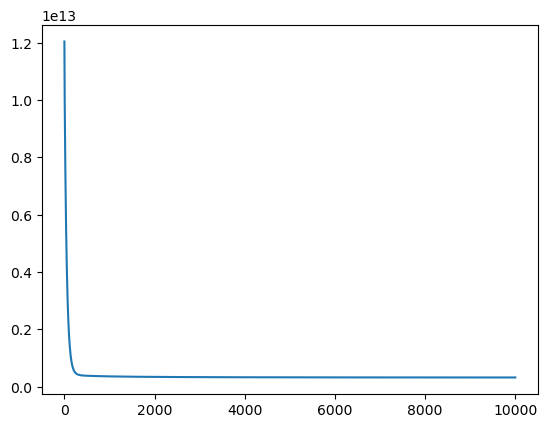

In [39]:
plt.plot(range(n_iterations), cost_history)
plt.show()

### 14) Evaluation du modèle - Coefficient de détermination

In [40]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [41]:
print("Le coefficient de determination de notre modèle est : ",coef_determination(y_test, predictions))

Le coefficient de determination de notre modèle est :  0.6294930092289419


### 16) Régularisation de la fonction cout

#### **Avec L1-Lasso

theta final avec régularisation Lasso  est :
 [[ 1.30254338e+05]
 [-2.59193874e+04]
 [ 8.19045415e+04]
 [ 7.11439064e+04]
 [-2.13651581e+04]
 [ 9.57714169e+04]
 [ 7.72461512e+04]
 [-6.58095839e+04]
 [-5.19924611e+04]
 [ 1.33322589e+04]
 [ 3.37590144e+03]
 [ 1.30287660e+05]
 [-9.04102478e+04]
 [ 1.47746389e+05]
 [ 2.63185375e+05]
 [ 7.95019823e+04]
 [ 7.79876141e+04]
 [-1.73046131e+05]
 [ 1.32921755e+05]
 [-1.14241843e+05]
 [ 6.81293062e+04]
 [-1.20970068e+05]
 [ 4.55583870e+04]
 [ 7.19314314e+04]
 [-6.57028626e+04]
 [ 6.93860680e+04]
 [ 4.15532209e+03]
 [ 3.19968820e+04]
 [ 6.03061778e+04]
 [ 4.58375680e+04]
 [ 1.18742039e+05]
 [-5.39166680e+03]
 [ 7.76055360e+04]
 [ 4.05895509e+04]
 [ 1.45332015e+05]
 [ 9.73453108e+04]
 [ 3.31550249e+04]
 [ 8.61552581e+04]
 [-1.23503079e+05]
 [-1.61845732e+05]
 [-2.96896677e+04]
 [ 2.07979691e+05]
 [ 8.35650578e+04]
 [ 2.16921901e+05]
 [-3.93307611e+04]
 [ 1.29565528e+05]
 [ 6.51089220e+04]
 [-6.82292851e+04]
 [-5.73151684e+04]
 [-7.09071812e+04]
 [ 1

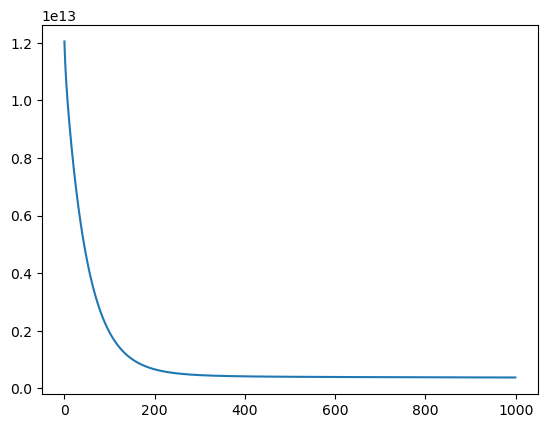

In [42]:
#fonction cout de Lasso
def cost_function_Lasso(X, y, theta, a):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2) + a/m * np.linalg.norm(theta, ord=1)

#gradient Lasso
def grad_Lasso(X, y, theta, a):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y) + a/m * theta * np.sign(theta)

#descente de gradient lasso
def gradient_descent_Lasso(X, y, theta, learning_rate, n_iterations, a):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad_Lasso(X, y, theta, a) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function_Lasso(X, y, theta, a) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

#phase d'entrainement 
n_iterations = 1000
learning_rate = 0.01
a = 11

theta_final_Lasso, cost_history_Lasso = gradient_descent_Lasso(X_train_norm, y_train, theta_initial, learning_rate, n_iterations, a)
print('theta final avec régularisation Lasso  est :\n',theta_final_Lasso)

#construire les predections avec le theta final Lasso
predictions_Lasso = model(X_test_norm, theta_final_Lasso)
print("\nLe coefficient de determination de notre modèle avec la régularisation Lasso est : ",coef_determination(y_test, predictions_Lasso))
    
#Affichage de la courbe d'apprentissage
plt.plot(range(n_iterations), cost_history_Lasso)
plt.show()


#### **Avec L2-Bridge

theta final avec régularisation Lasso  est :
 [[ 1.27216821e+05]
 [-2.46769068e+04]
 [ 7.97129702e+04]
 [ 6.96155384e+04]
 [-1.76266864e+04]
 [ 8.62024868e+04]
 [ 7.18918684e+04]
 [-6.06704340e+04]
 [-4.60540197e+04]
 [ 5.49239878e+03]
 [ 2.36266062e+03]
 [ 1.23142619e+05]
 [-8.16158580e+04]
 [ 1.43959892e+05]
 [ 2.61095911e+05]
 [ 7.86961793e+04]
 [ 7.53092916e+04]
 [-1.49117748e+05]
 [ 1.28029931e+05]
 [-1.01198814e+05]
 [ 6.65308588e+04]
 [-1.05134692e+05]
 [ 4.57012321e+04]
 [ 6.67730972e+04]
 [-5.53597864e+04]
 [ 6.57624269e+04]
 [ 1.08327483e+03]
 [ 3.04022975e+04]
 [ 4.87521156e+04]
 [ 3.95390358e+04]
 [ 1.07307306e+05]
 [-6.76865577e+03]
 [ 7.01634626e+04]
 [ 3.93789797e+04]
 [ 1.38953886e+05]
 [ 9.64896927e+04]
 [ 3.42302888e+04]
 [ 8.58648341e+04]
 [-1.09812880e+05]
 [-1.38899944e+05]
 [-3.05695460e+04]
 [ 2.07524945e+05]
 [ 7.89687601e+04]
 [ 2.15837552e+05]
 [-3.98353730e+04]
 [ 1.29109945e+05]
 [ 6.42100911e+04]
 [-6.19536052e+04]
 [-5.20883770e+04]
 [-6.49852816e+04]
 [ 1

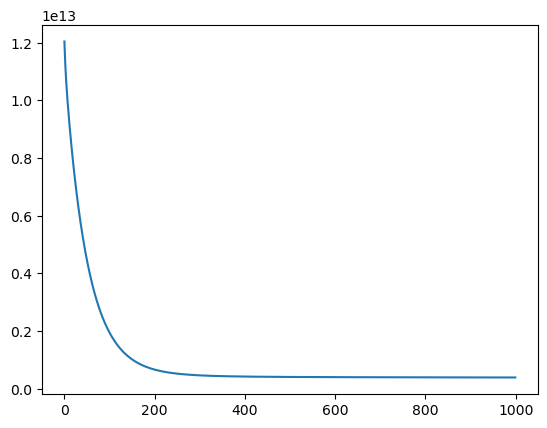

In [43]:
#fonction cout de Bridge
def cost_function_Bridge(X, y, theta, a):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2) + a/(2*m) * np.sum(theta[0:len(theta)-1]**2)

#gradient Bridge
def grad_Bridge(X, y, theta, a):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y) + a/m * theta

#descente de gradient Bridge
def gradient_descent_Bridge(X, y, theta, learning_rate, n_iterations, a):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad_Bridge(X, y, theta, a) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function_Bridge(X, y, theta, a) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

#phase d'entrainement 
n_iterations = 1000
learning_rate = 0.01

theta_final_Bridge, cost_history_Bridge = gradient_descent_Bridge(X_train_norm, y_train, theta_initial, learning_rate, n_iterations, a)
print('theta final avec régularisation Lasso  est :\n',theta_final_Bridge)

#construire les predections avec le theta final Bridge
predictions_Bridge = model(X_test_norm, theta_final_Bridge)
print("\nLe coefficient de determination de notre modèle avec la régularisation Bridge est : ",coef_determination(y_test, predictions_Bridge))
    
#Affichage de la courbe d'apprentissage
plt.plot(range(n_iterations), cost_history_Bridge)
plt.show()
